# Linear Regression
Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities
- Reference: Coursera Machine Learning Andrew Ng's course 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the dataset

In [2]:
df = pd.read_csv('data\ex1data1.txt', header = None, names = ['Population', 'Profit'])
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
Population,6.1101,5.5277,8.5186,7.0032,5.8598,8.3829,7.4764,8.5781,6.4862,5.0546,...,6.00200,5.5204,5.0594,5.7077,7.6366,5.8707,5.3054,8.29340,13.3940,5.43690
Profit,17.5920,9.1302,13.6620,11.8540,6.8233,11.8860,4.3483,12.0000,6.5987,3.8166,...,0.92695,0.1520,2.8214,1.8451,4.2959,7.2029,1.9869,0.14454,9.0551,0.61705


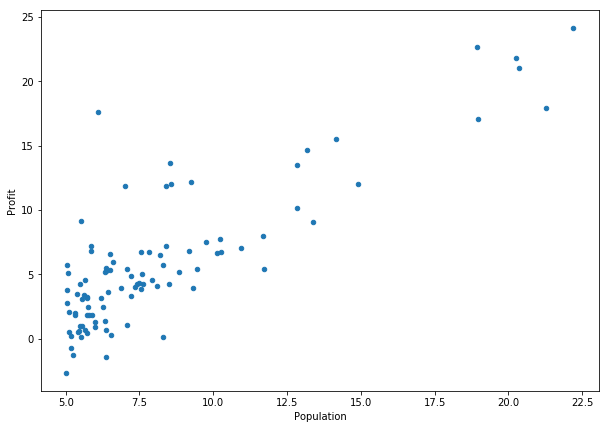

In [5]:
df.plot(kind = 'scatter', x = 'Population', y = 'Profit', figsize = (10,7))

### Function to compute the cost function 

In [6]:
def computeCost(X, y, theta):
    inner_product = np.power(((X * theta.T) - y) , 2)
    return np.sum(inner_product) / (2 * len(X))

### Appending 1s to the front of the dataset

In [7]:
df.insert(0, 'Ones', 1)

In [8]:
df.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


### Set training data (X) and target variable (y)

In [9]:
cols = df.shape[1]
cols

3

In [10]:
X = df.iloc[:, 0:cols-1]
y = df.iloc[:, cols-1:cols]

### Converting dataframe to numpy matrices and creating a parameter (theta) matrix

In [11]:
X = np.matrix(X.values)
y = np.matrix(y.values)

In [12]:
theta = np.matrix(np.array([0,0]))

In [13]:
theta

matrix([[0, 0]])

In [14]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [15]:
computeCost(X, y, theta)

32.072733877455676

### Function to perform gradient descent on parameters theta by repeatedly updating the parameters

In [16]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    # With each iteration, we are calculating the changes to be made to the
    # parameter (theta) value to reduce the error (cost)
    for i in range(iters):
        error = (X * theta.T) - y
        
        # number of parameters to be calculated,here we have 2 parameters theta [0,0] and theta [0,1]
        for j in range(parameters):
            term  = np.multiply(error, X[:, j])
            temp[0,j] = theta[0,j] -((alpha / len(X)) * np.sum(term))
          
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

### Set values for learning rate and number of iterations
- alpha here denotes the learning rate that helps to determine how quickly the algorithm
    will converge to the optimal solution
- iters denotes the number of iterations

In [17]:
alpha = 0.01
iters = 1000
# perform gradient descent to fit the model parameters and compute the cost
g, cost = gradientDescent(X, y, theta, alpha, iters)
print(g)
print(cost)

[[-3.24140214  1.1272942 ]]
[ 6.73719046  5.93159357  5.90115471  5.89522859  5.89009494  5.88500416
  5.87993248  5.87487909  5.86984391  5.86482687  5.85982789  5.85484692
  5.84988389  5.84493874  5.8400114   5.83510181  5.8302099   5.82533562
  5.82047889  5.81563965  5.81081784  5.8060134   5.80122627  5.79645638
  5.79170367  5.78696808  5.78224955  5.77754801  5.77286341  5.76819568
  5.76354477  5.75891061  5.75429313  5.7496923   5.74510803  5.74054027
  5.73598897  5.73145406  5.72693549  5.72243319  5.71794711  5.71347718
  5.70902336  5.70458558  5.70016379  5.69575792  5.69136792  5.68699373
  5.6826353   5.67829257  5.67396548  5.66965398  5.665358    5.6610775
  5.65681242  5.6525627   5.64832829  5.64410913  5.63990517  5.63571635
  5.63154261  5.62738391  5.6232402   5.6191114   5.61499748  5.61089837
  5.60681403  5.60274441  5.59868944  5.59464907  5.59062326  5.58661195
  5.58261509  5.57863263  5.57466451  5.57071068  5.56677109  5.5628457
  5.55893444  5.55503727 

In [18]:
computeCost(X, y, g)

4.5159555030789118




### Using Matplotlib library to visualize our solution using scatter plot

Text(0.5,1,'Predicted Profit vs. Population Size')

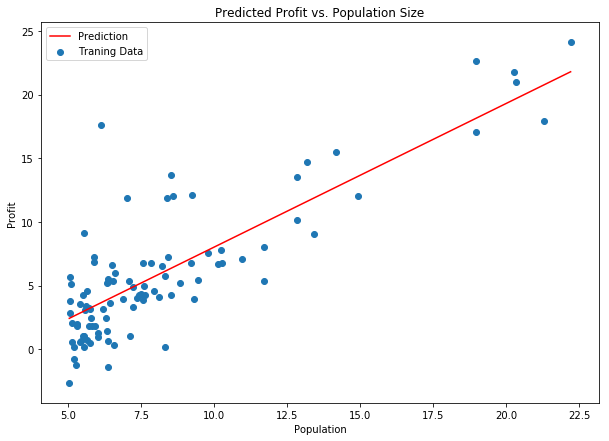

In [19]:
# linspace function will create an evenly-spaced series of points within the range of our data
x = np.linspace(df.Population.min(), df.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(10, 7))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(df.Population, df.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')


###  Plotting the graph of the gradient descent function which outputs a vector with the cost at each training iteration.

Text(0.5,1,'Error vs Training epoch')

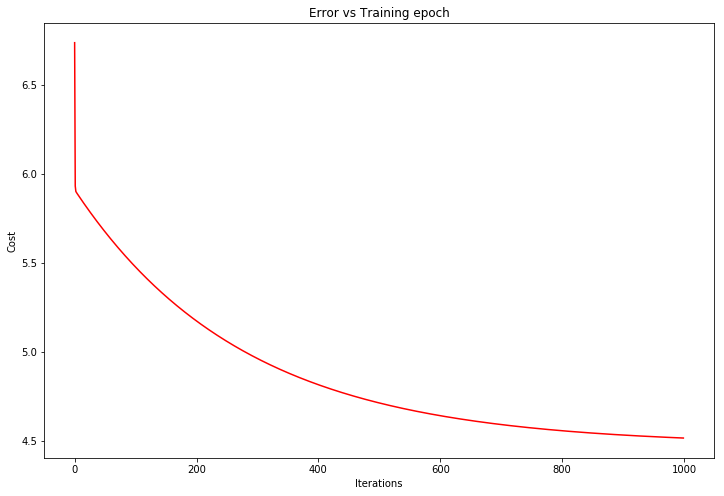

In [20]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training epoch')